In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
testdata = pd.read_csv('./datasets/test/_annotations.csv')
traindata = pd.read_csv('./datasets/train/_annotations.csv')
validdata = pd.read_csv('./datasets/valid/_annotations.csv')

In [6]:
traindata

,filename,width,height,class,xmin,ymin,xmax,ymax
0,zoom_tests_RockPaperScissors-mohamed_mp4-67_jp...,640,640,Rock,12,0,141,250
1,egohands-public-1625070649053_png_jpg.rf.000a5...,640,640,Rock,153,407,485,637
2,zoom_tests_RockPaperScissors-mohamed_mp4-111_j...,640,640,Paper,0,227,233,640
3,IMG_5636_MOV-61_jpg.rf.003476f680b71b74f3764a1...,640,640,Rock,28,367,175,467
4,IMG_5636_MOV-61_jpg.rf.003476f680b71b74f3764a1...,640,640,Paper,281,333,556,452
...,...,...,...,...,...,...,...,...
7816,IMG_5567_mp4-163_jpg.rf.c7c964e5f3334f60c8f6f6...,640,640,Paper,416,305,623,430
7817,Screen-Shot-2022-02-08-at-1-00-58-PM_png.rf.c7...,640,640,Scissors,461,179,640,477
7818,IMG_5567_mp4-89_jpg.rf.c7b9f669eca26311965b115...,640,640,Paper,220,381,435,519
7819,IMG_7043_MOV-176_jpg.rf.c7cc43070427a0b1b23af9...,640,640,Rock,0,226,520,526


In [7]:
import cv2
import matplotlib.pyplot as plt

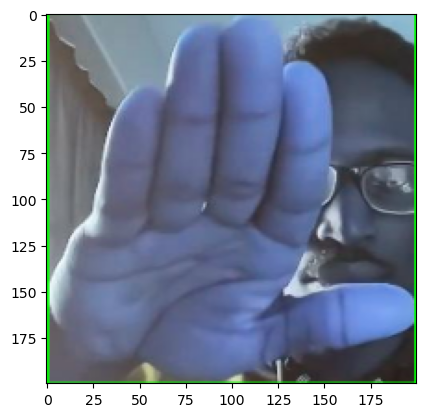

In [8]:
testimg = cv2.imread('./datasets/test/zoom_tests_RockPaperScissors-mohamed_mp4-107_jpg.rf.056c26adf21336e65bd2ff9fcfe79df9.jpg')
img = cv2.rectangle(testimg, (190,120), (419, 526) , (0,255,0), 2)
imgt2 = testimg[120:526, 190:419]
imgt2 = cv2.resize(imgt2, (200, 200))
plt.imshow(imgt2)

In [9]:
y_train = traindata['class']
y_test = testdata['class']
y_valid = validdata['class']
y_train

0           Rock
1           Rock
2          Paper
3           Rock
4          Paper
          ...   
7816       Paper
7817    Scissors
7818       Paper
7819        Rock
7820       Paper
Name: class, Length: 7821, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_valid = le.fit_transform(y_valid)
y_train

array([1, 1, 0, ..., 0, 1, 0])

### now testing the model to classify stone paper scissor in new image

In [11]:
def process_image(row, folder):
    image_path = './datasets/' + folder + '/' + row['filename']
    img = cv2.imread(image_path)
    img = cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0, 255, 0), 2)
    img_cropped = img[row['ymin']:row['ymax'], row['xmin']:row['xmax']]
    img_resized = cv2.resize(img_cropped, (32, 32))
    return img_resized

In [12]:
testdf = testdata.apply(process_image, axis=1, args=("test",))

In [13]:
testdf

0      [[[97, 151, 162], [101, 142, 174], [103, 146, ...
1      [[[86, 121, 19], [109, 83, 23], [110, 84, 24],...
2      [[[185, 193, 171], [182, 193, 170], [186, 198,...
3      [[[167, 182, 181], [170, 190, 195], [187, 207,...
4      [[[81, 84, 73], [98, 87, 68], [90, 81, 62], [8...
                             ...                        
212    [[[0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 2...
213    [[[0, 255, 0], [0, 255, 0], [0, 255, 0], [0, 2...
214    [[[212, 83, 168], [212, 83, 168], [213, 82, 16...
215    [[[116, 133, 142], [115, 132, 141], [114, 133,...
216    [[[12, 74, 25], [10, 71, 16], [12, 73, 16], [8...
Length: 217, dtype: object

In [14]:
is_tensor = tf.is_tensor(testdf[0])

if is_tensor:
    print("The object is a TensorFlow tensor.")
else:
    print("The object is not a TensorFlow tensor.")

The object is not a TensorFlow tensor.


In [15]:
traindf = traindata.apply(process_image, axis=1, args=("train",))

In [16]:
validdf = validdata.apply(process_image, axis=1, args=("valid",))

In [17]:
traindf

0       [[[59, 207, 87], [108, 148, 161], [119, 160, 1...
1       [[[128, 125, 121], [123, 120, 115], [124, 123,...
2       [[[239, 254, 255], [255, 255, 255], [255, 255,...
3       [[[2, 244, 2], [2, 241, 2], [2, 241, 2], [2, 2...
4       [[[11, 182, 32], [17, 187, 39], [13, 183, 33],...
                              ...                        
7816    [[[66, 225, 111], [65, 224, 111], [66, 225, 11...
7817    [[[151, 161, 179], [150, 160, 178], [151, 161,...
7818    [[[125, 242, 167], [124, 241, 167], [125, 243,...
7819    [[[79, 85, 90], [81, 87, 92], [83, 91, 93], [8...
7820    [[[43, 30, 54], [39, 23, 54], [48, 30, 67], [4...
Length: 7821, dtype: object

In [18]:
testdf = testdf.to_numpy()

In [19]:
import numpy as np

In [20]:
traindf.shape

(7821,)

In [21]:
testdf = [tf.convert_to_tensor(item) for item in testdf]
testdf = tf.convert_to_tensor(testdf)

In [22]:
traindf = traindf.to_numpy()

In [23]:
traindf = [tf.convert_to_tensor(item) for item in traindf]
traindf = tf.convert_to_tensor(traindf)

In [24]:
validdf = validdf.to_numpy()

In [25]:
validdf = [tf.convert_to_tensor(item) for item in validdf]
validdf = tf.convert_to_tensor(validdf)

In [26]:
x_train, x_test, x_valid = traindf/255 , testdf/255 , validdf/255

In [27]:
from tensorflow.keras import layers , models

In [28]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [29]:
y_train.shape

(7821,)

In [30]:
y_test

array([0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2,
       2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2,
       1, 1, 0, 1, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2,
       2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0,
       1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0,
       2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 2, 0,
       2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0])

In [31]:
x_test

<tf.Tensor: shape=(217, 32, 32, 3), dtype=float32, numpy=
array([[[[0.38039216, 0.5921569 , 0.63529414],
         [0.39607844, 0.5568628 , 0.68235296],
         [0.40392157, 0.57254905, 0.7019608 ],
         ...,
         [0.5372549 , 0.7176471 , 0.8509804 ],
         [0.5372549 , 0.7176471 , 0.8509804 ],
         [0.5411765 , 0.72156864, 0.85490197]],

        [[0.37254903, 0.58431375, 0.627451  ],
         [0.38039216, 0.5411765 , 0.6666667 ],
         [0.3764706 , 0.54509807, 0.6745098 ],
         ...,
         [0.5294118 , 0.70980394, 0.84313726],
         [0.53333336, 0.7137255 , 0.84705883],
         [0.5294118 , 0.70980394, 0.84313726]],

        [[0.37254903, 0.5803922 , 0.62352943],
         [0.3882353 , 0.5529412 , 0.6666667 ],
         [0.38039216, 0.5529412 , 0.6666667 ],
         ...,
         [0.50980395, 0.6901961 , 0.8235294 ],
         [0.52156866, 0.7019608 , 0.8352941 ],
         [0.5137255 , 0.69411767, 0.827451  ]],

        ...,

        [[0.43529412, 0.6       , 

In [32]:
cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [33]:
cnn.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
245/245 [==============================] - 15s 53ms/step - loss: 0.9270 - accuracy: 0.5660 - val_loss: 0.7033 - val_accuracy: 0.6675
Epoch 2/10
245/245 [==============================] - 14s 56ms/step - loss: 0.6603 - accuracy: 0.7199 - val_loss: 0.5718 - val_accuracy: 0.7632
Epoch 3/10
245/245 [==============================] - 16s 65ms/step - loss: 0.5529 - accuracy: 0.7760 - val_loss: 0.5048 - val_accuracy: 0.8110
Epoch 4/10
245/245 [==============================] - 13s 52ms/step - loss: 0.4787 - accuracy: 0.8076 - val_loss: 0.5111 - val_accuracy: 0.8206
Epoch 5/10
245/245 [==============================] - 13s 54ms/step - loss: 0.4095 - accuracy: 0.8425 - val_loss: 0.4493 - val_accuracy: 0.8565
Epoch 6/10
245/245 [==============================] - 11s 47ms/step - loss: 0.3465 - accuracy: 0.8732 - val_loss: 0.5668 - val_accuracy: 0.8014
Epoch 7/10
245/245 [==============================] - 13s 53ms/step - loss: 0.3102 - accuracy: 0.8863 - val_loss: 0.4125 - val_accuracy:

In [34]:
cnn.evaluate(x_test,y_test)

7/7 [==============================] - 0s 16ms/step - loss: 0.4487 - accuracy: 0.8571


[0.4487156569957733, 0.8571428656578064]

In [35]:
y_pred = cnn.predict(x_test)

7/7 [==============================] - 0s 14ms/step


In [44]:
cnn.predict(x_test[:1])

1/1 [==============================] - 0s 42ms/step


array([[9.38729644e-01, 2.96500102e-02, 3.11149415e-02, 5.36836378e-05,
        3.21029838e-05, 4.47670936e-05, 9.88312677e-05, 9.66179286e-05,
        1.15705894e-04, 6.37383710e-05]], dtype=float32)

In [36]:
y_pred[:5]

array([[9.38729644e-01, 2.96500027e-02, 3.11149415e-02, 5.36836378e-05,
        3.21029838e-05, 4.47670936e-05, 9.88312677e-05, 9.66179286e-05,
        1.15706018e-04, 6.37383710e-05],
       [4.17178730e-04, 9.99456465e-01, 1.26364946e-04, 6.10873752e-09,
        1.05353359e-09, 1.56800994e-09, 1.44430983e-08, 2.82647172e-09,
        1.43011558e-08, 3.60990154e-10],
       [5.71697764e-03, 1.29236098e-04, 9.94153202e-01, 4.27325695e-08,
        1.52362158e-08, 3.36276571e-08, 6.90847646e-09, 1.75421050e-07,
        8.65564473e-08, 1.10748985e-07],
       [2.13196278e-02, 9.39150333e-01, 3.94776203e-02, 5.88509192e-06,
        2.12588475e-06, 4.10442226e-06, 1.61285898e-05, 6.36505547e-06,
        1.71050069e-05, 7.13908548e-07],
       [4.21471409e-02, 1.58302009e-05, 9.57836986e-01, 3.02088354e-10,
        7.70215419e-11, 9.34092664e-11, 3.79464724e-11, 2.11495199e-09,
        3.47671203e-09, 2.74595502e-09]], dtype=float32)

In [37]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[30:35]

[0, 2, 2, 0, 0]

In [38]:
y_test[30:35]

array([0, 2, 2, 0, 0])

In [39]:
from sklearn.metrics import classification_report

In [40]:
print("Classification Report : \n", classification_report(y_test,y_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        73
           1       0.90      0.88      0.89        75
           2       0.90      0.87      0.88        69

    accuracy                           0.86       217
   macro avg       0.86      0.86      0.86       217
weighted avg       0.86      0.86      0.86       217



In [41]:
import pickle

In [42]:
with open('model_pickle','wb') as f:
    pickle.dump(cnn,f)